   size  bedrooms  bathrooms  location_score   price
0  3974         1          2        8.758384  455891
1  1660         5          1        8.600945  323725
2  2094         5          2        3.871904  267450
3  1930         1          1        8.460239  273724
4  1895         5          3        1.333069  303502


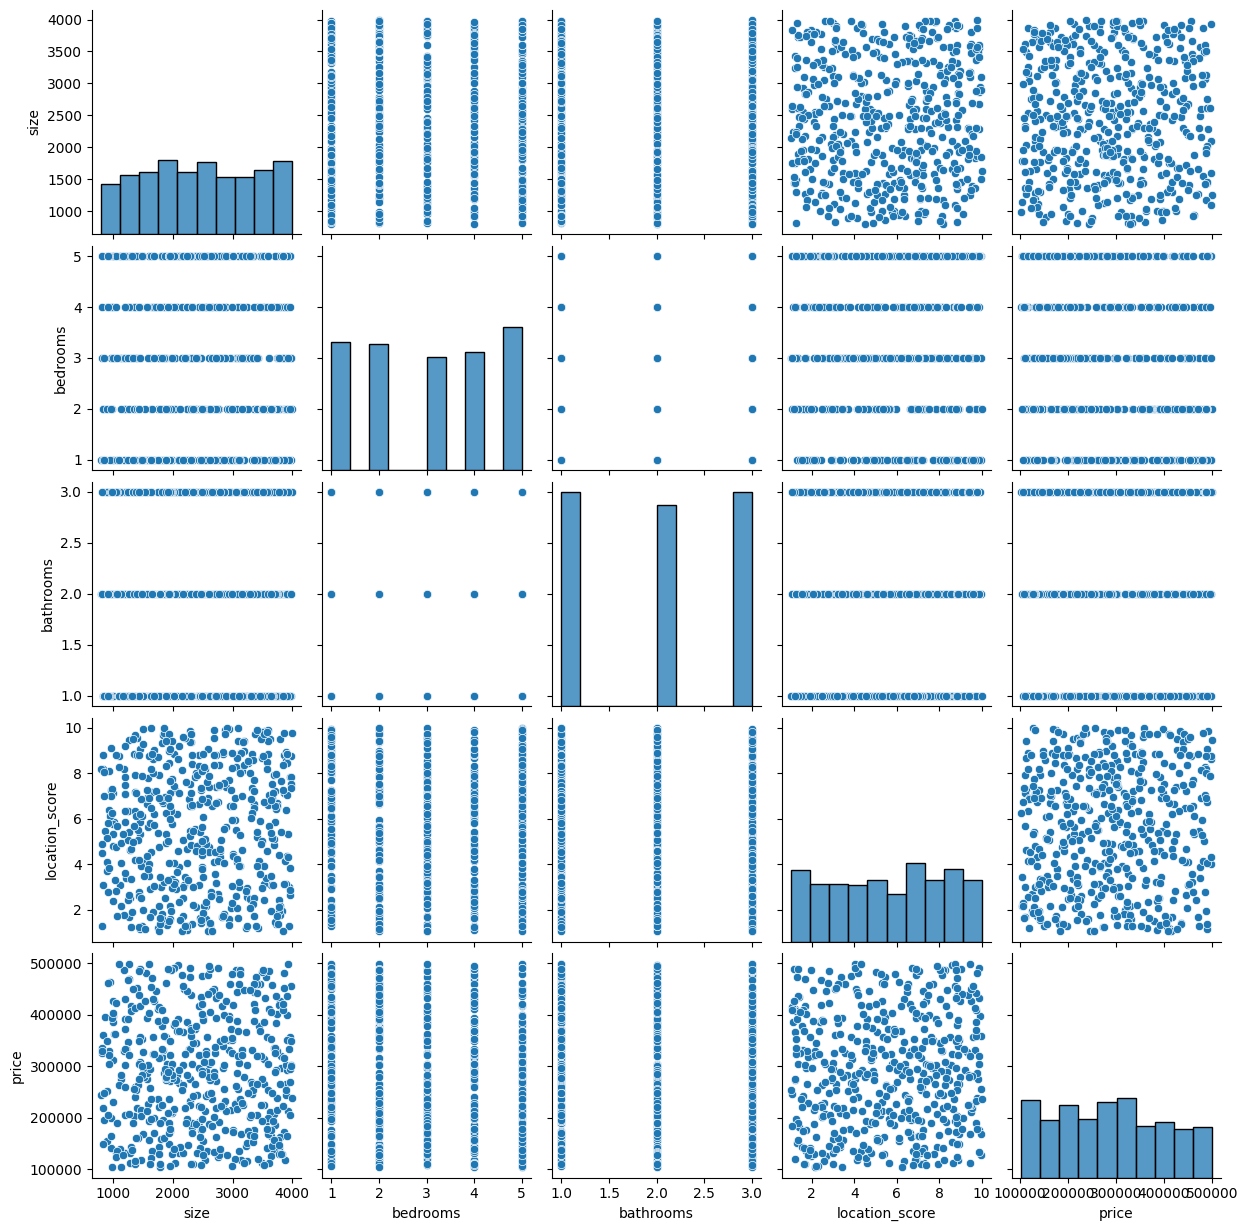

RMSE del modelo: 123079.45


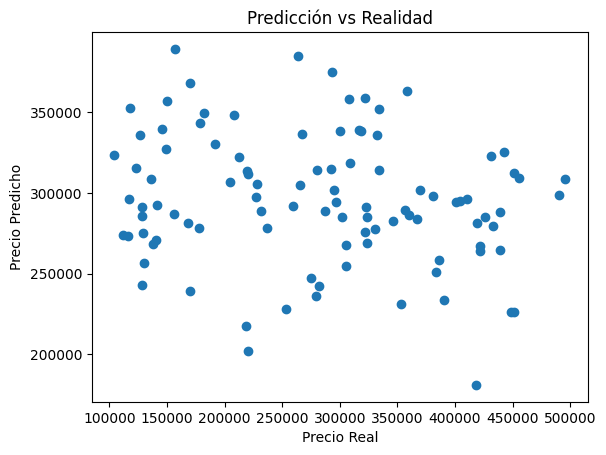

In [1]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Generación de datos sintéticos (o cargar datos reales)
np.random.seed(42)
data = {
    "size": np.random.randint(800, 4000, 500),  # Tamaño en pies cuadrados
    "bedrooms": np.random.randint(1, 6, 500),   # Número de habitaciones
    "bathrooms": np.random.randint(1, 4, 500),  # Número de baños
    "location_score": np.random.uniform(1, 10, 500), # Calidad de ubicación
    "price": np.random.randint(100000, 500000, 500)  # Precio
}
df = pd.DataFrame(data)

# Análisis exploratorio
print(df.head())
sns.pairplot(df)
plt.show()

# División de datos en entrenamiento y prueba
X = df[["size", "bedrooms", "bathrooms", "location_score"]]
y = df["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predicción y evaluación
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE del modelo: {rmse:.2f}")

# Visualización de resultados
plt.scatter(y_test, y_pred)
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("Predicción vs Realidad")
plt.show()
